<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem Statement</a></span></li><li><span><a href="#Data-Source" data-toc-modified-id="Data-Source-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Source</a></span></li><li><span><a href="#Importing-the-libraries" data-toc-modified-id="Importing-the-libraries-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Importing the libraries</a></span></li><li><span><a href="#Importing-the-Dataset" data-toc-modified-id="Importing-the-Dataset-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Importing the Dataset</a></span><ul class="toc-item"><li><span><a href="#Dataset-Info" data-toc-modified-id="Dataset-Info-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Dataset Info</a></span></li><li><span><a href="#Loading-train-images" data-toc-modified-id="Loading-train-images-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Loading train images</a></span></li><li><span><a href="#Loading-test-images" data-toc-modified-id="Loading-test-images-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Loading test images</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Countplot" data-toc-modified-id="Countplot-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Countplot</a></span></li><li><span><a href="#View-the-images-in-the-dataset" data-toc-modified-id="View-the-images-in-the-dataset-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>View the images in the dataset</a></span></li></ul></li><li><span><a href="#Model-Building" data-toc-modified-id="Model-Building-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model Building</a></span><ul class="toc-item"><li><span><a href="#Evaluating-the-model-performance" data-toc-modified-id="Evaluating-the-model-performance-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Evaluating the model performance</a></span><ul class="toc-item"><li><span><a href="#Plotting-the-loss-and-accuracy-curves-for-training-and-validation" data-toc-modified-id="Plotting-the-loss-and-accuracy-curves-for-training-and-validation-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Plotting the loss and accuracy curves for training and validation</a></span></li><li><span><a href="#Plotting-the-Confusion-Matrix" data-toc-modified-id="Plotting-the-Confusion-Matrix-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>Plotting the Confusion Matrix</a></span></li></ul></li><li><span><a href="#Predicting-the-test-data" data-toc-modified-id="Predicting-the-test-data-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Predicting the test data</a></span></li></ul></li></ul></div>

# Problem Statement

**Can you predict the handwritten digits using machines?**

The goal of this project is to create a model that will be able to recognize and determine the handwritten digits from its image by using the concepts of Convolution Neural Network. The major goal of the proposed system is understanding Convolutional Neural Network, and applying it to the handwritten recognition system.

# Data Source

Kaggle - https://www.kaggle.com/c/digit-recognizer/data

# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm

# for reading and displaying images
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for creating validation set
from sklearn.model_selection import train_test_split

# for evaluating the model
from sklearn.metrics import accuracy_score

# Importing the Dataset

In [2]:
train=pd.read_csv("C:/Users/mudit/notebook/MNIST/train.csv")
test=pd.read_csv("C:/Users/mudit/notebook/MNIST/Test_fCbTej3_0j1gHmj.csv")
train_path="C:/Users/mudit/notebook/MNIST/Images/train/"
test_path="C:/Users/mudit/notebook/MNIST/Images/test/"

## Dataset Info

In [3]:
train.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49000 entries, 0 to 48999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  49000 non-null  object
 1   label     49000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 765.8+ KB


In [5]:
test.head()

,filename
0,49000.png
1,49001.png
2,49002.png
3,49003.png
4,49004.png


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  21000 non-null  object
dtypes: object(1)
memory usage: 164.2+ KB


## Loading train images

In [7]:
train_img = []
for img_name in tqdm(train['filename']):
    # defining the image path
    image_path = train_path + img_name
    # reading the image
    img = imread(image_path)
    # normalizing the pixel values
    img = img/255
    # resizing the image to (28,28,1)
    img = resize(img, output_shape=(28,28,1), mode='constant', anti_aliasing=True)
    # converting the type of pixel to float 32
    img = img.astype('float32')
    # appending the image into the list
    train_img.append(img)

# converting the list to numpy array
train_x = np.array(train_img)
train_x.shape

100%|███████████████████████████████████████████████████████████████████████████| 49000/49000 [01:30<00:00, 539.02it/s]


(49000, 28, 28, 1)

## Loading test images

In [8]:
test_img = []
for img_name in tqdm(test['filename']):
    # defining the image path
    image_path = test_path + img_name
    # reading the image
    img = imread(image_path)
    # normalizing the pixel values
    img = img/255
    # resizing the image to (28,28,1)
    img = resize(img, output_shape=(28,28,1), mode='constant', anti_aliasing=True)
    # converting the type of pixel to float 32
    img = img.astype('float32')
    # appending the image into the list
    test_img.append(img)

# converting the list to numpy array
test_x = np.array(test_img)
test_x.shape

100%|███████████████████████████████████████████████████████████████████████████| 21000/21000 [00:37<00:00, 566.22it/s]


(21000, 28, 28, 1)

Saving the loaded image data in the form of numpy array files.

In [9]:
from numpy import save

save('X_train.npy', train_x)
save('X_test.npy', test_x)

In [11]:
x_train = np.load('C:/Users/mudit/notebook/MNIST/X_train.npy', allow_pickle=True)
x_test = np.load('C:/Users/mudit/notebook/MNIST/X_test.npy', allow_pickle=True)

In [12]:
print(x_train.shape)
print(x_test.shape)

(49000, 28, 28, 1)
(21000, 28, 28, 1)


# Exploratory Data Analysis

In [13]:
print("\n Shape of the train dataset:", train.shape)


 Shape of the train dataset: (49000, 2)


In [14]:
#NaN values in the train dataset ?
nan = train.isnull().sum()
print(nan[nan != 0])

Series([], dtype: int64)


In [15]:
print("\n Shape of the test dataset:", test.shape)


 Shape of the test dataset: (21000, 1)


In [16]:
#NaN values in the test dataset ?
nan = test.isnull().sum()
print(nan[nan != 0])

Series([], dtype: int64)


In [17]:
y_train = train['label']
from tensorflow.keras.utils import to_categorical
print(y_train.shape)
y_train = to_categorical(y_train, num_classes=10)
print(y_train.shape)
print(y_train[0])

(49000,)
(49000, 10)
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


## Countplot
To determine the count of each label in the train data.

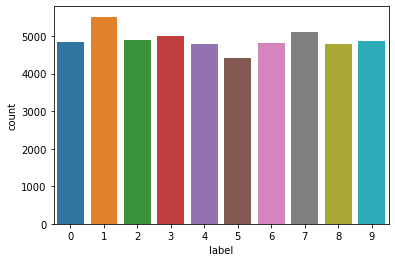

In [18]:
sns.countplot(x=train['label'])
plt.show()

## View the images in the dataset

In [19]:
train_images = []
for img_name in tqdm(train['filename']):
    image_path = train_path + img_name
    img = imread(image_path)
    train_images.append(img)

100%|███████████████████████████████████████████████████████████████████████████| 49000/49000 [01:22<00:00, 594.13it/s]


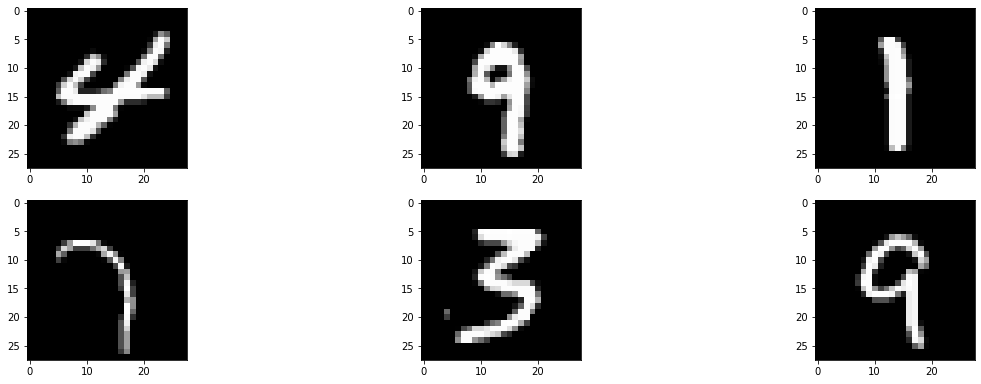

In [20]:
plt.figure(figsize=(20,10))
for i in range(6):
    plt.subplot(330+1+i)
    plt.imshow(train_images[i])
plt.show()

# Model Building

In [21]:
import tensorflow as tf

In [22]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(input_shape=[28,28,1],kernel_size=3,filters=32,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Conv2D(kernel_size=3,filters=32,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [23]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               102528    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [25]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
                                                            shear_range=10, height_shift_range=0.1, zoom_range=0.2)
datagen.fit(x_train)

In [26]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state=0)

I chose to split the train set in two parts : a small fraction (10%) became the validation set which the model is evaluated and the rest (90%) is used to train the model.

In [27]:
history=cnn.fit(datagen.flow(x_train, y_train, batch_size=32,shuffle=True),validation_data = (x_val,y_val),
                    steps_per_epoch=len(x_train) /32, epochs=5,verbose=1)

Epoch 1/5
1379/1378 [==============================] - 17s 12ms/step - loss: 0.4712 - accuracy: 0.8496 - val_loss: 0.1191 - val_accuracy: 0.9584
Epoch 2/5
1379/1378 [==============================] - 16s 12ms/step - loss: 0.1706 - accuracy: 0.9487 - val_loss: 0.1090 - val_accuracy: 0.9671
Epoch 3/5
1379/1378 [==============================] - 17s 12ms/step - loss: 0.1217 - accuracy: 0.9632 - val_loss: 0.0577 - val_accuracy: 0.9837
Epoch 4/5
1379/1378 [==============================] - 17s 12ms/step - loss: 0.0994 - accuracy: 0.9698 - val_loss: 0.0421 - val_accuracy: 0.9859
Epoch 5/5
1379/1378 [==============================] - 18s 13ms/step - loss: 0.0849 - accuracy: 0.9741 - val_loss: 0.0489 - val_accuracy: 0.9833


## Evaluating the model performance

### Plotting the loss and accuracy curves for training and validation

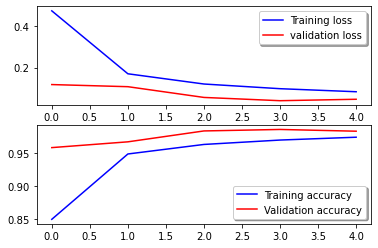

In [28]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

### Plotting the Confusion Matrix

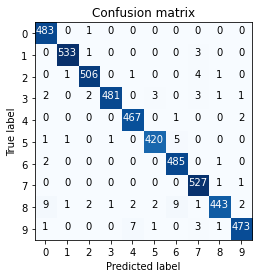

In [29]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)


    threshold = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
y_pred = cnn.predict(x_val)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_val,axis = 1) 
# plot the confusion matrix
plot_confusion_matrix(confusion_matrix(y_true, y_pred_classes), classes = range(10)) 

## Predicting the test data

In [30]:
cnn.predict(x_test)

array([[3.5748236e-12, 8.0541962e-11, 5.6027083e-10, ..., 2.2992865e-09,
        9.5514138e-11, 4.5484172e-09],
       [9.9777764e-01, 9.3018696e-07, 1.2859781e-03, ..., 1.3709277e-08,
        4.7532894e-04, 4.3606138e-05],
       [3.0411830e-02, 1.7613329e-08, 6.9867435e-04, ..., 5.2893894e-05,
        6.3311285e-04, 9.6449620e-01],
       ...,
       [2.7927042e-06, 2.5874933e-10, 1.7942104e-07, ..., 3.7122814e-12,
        9.7622774e-08, 4.1995318e-10],
       [1.0678951e-06, 2.7152980e-08, 4.8809735e-08, ..., 4.1547560e-12,
        1.7609912e-07, 4.4336146e-10],
       [7.6577152e-07, 3.6112425e-08, 9.9998879e-01, ..., 1.5583415e-09,
        2.4858531e-08, 6.7209593e-09]], dtype=float32)

In [31]:
pd.DataFrame(cnn.predict(x_test))

,0,1,2,3,4,5,6,7,8,9
0,3.574824e-12,8.054196e-11,5.602708e-10,6.218802e-12,1.000000e+00,1.723974e-11,4.121104e-10,2.299287e-09,9.551414e-11,4.548417e-09
1,9.977776e-01,9.301870e-07,1.285978e-03,1.318042e-07,6.337967e-05,2.139860e-09,3.528895e-04,1.370928e-08,4.753289e-04,4.360614e-05
2,3.041183e-02,1.761333e-08,6.986744e-04,3.312392e-03,3.544360e-04,3.642875e-05,4.014922e-06,5.289389e-05,6.331129e-04,9.644962e-01
3,4.443670e-06,2.093031e-05,8.551038e-04,4.735266e-05,8.897330e-07,1.299543e-07,4.883871e-10,9.990582e-01,2.338490e-06,1.058862e-05
4,6.827753e-11,6.763844e-13,1.032566e-08,6.296341e-09,1.218630e-05,2.163338e-07,6.991291e-12,1.861823e-06,6.987790e-05,9.999158e-01
...,...,...,...,...,...,...,...,...,...,...
20995,6.678944e-05,8.922661e-06,6.000007e-06,6.915207e-06,8.889020e-03,3.509909e-07,3.753720e-08,3.920595e-03,1.251429e-05,9.870889e-01
20996,1.790682e-08,3.769129e-08,9.999989e-01,7.400164e-07,1.323261e-10,1.801563e-11,9.615539e-12,1.671680e-08,3.486401e-07,2.183130e-09
20997,2.792704e-06,2.587493e-10,1.794210e-07,1.446502e-11,2.699727e-07,7.774342e-07,9.999958e-01,3.712281e-12,9.762277e-08,4.199532e-10
20998,1.067895e-06,2.715298e-08,4.880973e-08,1.842040e-10,8.196461e-07,1.111811e-06,9.999968e-01,4.154756e-12,1.760991e-07,4.433615e-10


In [32]:
# loading training images
test_res = []
for j,i in tqdm(pd.DataFrame(cnn.predict(x_test)).iterrows()):
    test_res.append(i.argmax())       

21000it [00:01, 10580.81it/s]


In [33]:
test['label']=test_res

In [34]:
test

,filename,label
0,49000.png,4
1,49001.png,0
2,49002.png,9
3,49003.png,7
4,49004.png,9
...,...,...
20995,69995.png,9
20996,69996.png,2
20997,69997.png,6
20998,69998.png,6


In [35]:
pd.DataFrame(test).to_csv('C:/Users/mudit/notebook/MNIST/test_MNIST.csv', index=False)

In [36]:
cnn.save("model_mnist_digit.h5")